In [111]:
import pandas as pd

In [112]:
file_path = 'Reporte.csv'
df = pd.read_csv(file_path)
df

,id_claim_number,id_case_number,case_serial,date_created,sku,name,user_description,value
0,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,Seleccion de tipo problema de calidad,rust
1,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,Cantidad reportada problemas de calidad,22
2,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,"Cliente se queda con el producto, problemas de...",true
3,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,Campo que almacena el valor de descuento selec...,30.65
4,2211,3240,RC-2211-CS-3240-PA,2024-04-05 07:34:23.742,50000853,Cantidad diferente,Resultado de seleccion producto faltante o sob...,missing_amount
...,...,...,...,...,...,...,...,...
5425,3873,4870,RC-3873-CS-4870-GT,2024-10-23 15:57:37.774,50001571,Cantidad diferente,Cantidad reportada cantidad diferente,02
5426,3893,4873,RC-3893-CS-4873-GT,2024-10-23 18:31:41.845,50000586,Cantidad diferente,Resultado de seleccion producto faltante o sob...,leftover_quantity
5427,3893,4873,RC-3893-CS-4873-GT,2024-10-23 18:31:41.845,50000586,Cantidad diferente,Cantidad reportada cantidad diferente,02
5428,3896,4874,RC-3896-CS-4874-GT,2024-10-23 21:21:04.325,50001579,Cantidad diferente,Resultado de seleccion producto faltante o sob...,leftover_quantity


In [113]:
# Pivotar el DataFrame: crear columnas para cada valor de 'user_description' con sus correspondientes 'value'
df_pivot = df.pivot_table(index=['id_claim_number', 'id_case_number', 'case_serial', 'date_created', 'sku', 'name'],
                          columns='user_description', values='value', aggfunc='first').reset_index()

df_pivot

user_description,id_claim_number,id_case_number,case_serial,date_created,sku,name,Campo de seleccion de razon entrega tarde,Campo de seleccion para determinar si la ruta se agino tarde o no,Campo que almacena el valor de descuento seleccionado por problemas de calidad,Cantidad reportada cantidad diferente,Cantidad reportada problemas de calidad,Cantidad reportada producto cruzado,"Cliente se queda con el producto, entrega tarde","Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,"Valor ingresado, tiempo o fecha","Vendedor selecciona solicitar un descuento o no, problemas de calidad",producto seleccionado flujo cantidad diferente
0,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,NaN,NaN,30.65,NaN,22,NaN,NaN,true,NaN,NaN,rust,NaN,NaN,NaN
1,1801,2875,RC-1801-CS-2875-GT,2023-10-19 12:00:55.143,50000086,Calidad,NaN,NaN,2.00,NaN,1,NaN,NaN,true,NaN,NaN,fold,NaN,NaN,NaN
2,1802,2876,RC-1802-CS-2876-GT,2023-10-19 16:33:27.839,50000647,Calidad,NaN,NaN,NaN,NaN,2,NaN,NaN,false,NaN,NaN,rust,NaN,NaN,NaN
3,1804,2878,RC-1804-CS-2878-GT,2023-10-24 15:01:48.867,50000532,Calidad,NaN,NaN,NaN,NaN,01,NaN,NaN,NaN,NaN,NaN,damaged,NaN,NaN,NaN
4,1804,2879,RC-1804-CS-2879-GT,2023-10-24 15:03:34.616,50000719,Calidad,NaN,NaN,NaN,NaN,02,NaN,NaN,NaN,NaN,NaN,fold,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,3862,4857,RC-3862-CS-4857-GT,2024-10-22 21:25:20.177,50000335,Calidad,NaN,NaN,NaN,NaN,02,NaN,NaN,false,NaN,NaN,manufacture_issue,NaN,NaN,NaN
1672,3862,4858,RC-3862-CS-4858-GT,2024-10-22 22:07:18.610,50000335,Cantidad diferente,NaN,NaN,NaN,02,NaN,NaN,NaN,NaN,NaN,leftover_quantity,NaN,NaN,NaN,NaN
1673,3873,4870,RC-3873-CS-4870-GT,2024-10-23 15:57:37.774,50001571,Cantidad diferente,NaN,NaN,NaN,02,NaN,NaN,NaN,NaN,NaN,missing_amount,NaN,NaN,NaN,NaN
1674,3893,4873,RC-3893-CS-4873-GT,2024-10-23 18:31:41.845,50000586,Cantidad diferente,NaN,NaN,NaN,02,NaN,NaN,NaN,NaN,NaN,leftover_quantity,NaN,NaN,NaN,NaN


In [114]:
# Renombrar las columnas para eliminar multiindex en el nombre de las columnas
df_pivot.columns.name = None

In [115]:
# Extraer los últimos dos caracteres de 'case_serial' para identificar el país
df_pivot['country'] = df_pivot['case_serial'].str[-2:]
df_pivot

,id_claim_number,id_case_number,case_serial,date_created,sku,name,Campo de seleccion de razon entrega tarde,Campo de seleccion para determinar si la ruta se agino tarde o no,Campo que almacena el valor de descuento seleccionado por problemas de calidad,Cantidad reportada cantidad diferente,...,Cantidad reportada producto cruzado,"Cliente se queda con el producto, entrega tarde","Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,"Valor ingresado, tiempo o fecha","Vendedor selecciona solicitar un descuento o no, problemas de calidad",producto seleccionado flujo cantidad diferente,country
0,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,NaN,NaN,30.65,NaN,...,NaN,NaN,true,NaN,NaN,rust,NaN,NaN,NaN,GT
1,1801,2875,RC-1801-CS-2875-GT,2023-10-19 12:00:55.143,50000086,Calidad,NaN,NaN,2.00,NaN,...,NaN,NaN,true,NaN,NaN,fold,NaN,NaN,NaN,GT
2,1802,2876,RC-1802-CS-2876-GT,2023-10-19 16:33:27.839,50000647,Calidad,NaN,NaN,NaN,NaN,...,NaN,NaN,false,NaN,NaN,rust,NaN,NaN,NaN,GT
3,1804,2878,RC-1804-CS-2878-GT,2023-10-24 15:01:48.867,50000532,Calidad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,damaged,NaN,NaN,NaN,GT
4,1804,2879,RC-1804-CS-2879-GT,2023-10-24 15:03:34.616,50000719,Calidad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,fold,NaN,NaN,NaN,GT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,3862,4857,RC-3862-CS-4857-GT,2024-10-22 21:25:20.177,50000335,Calidad,NaN,NaN,NaN,NaN,...,NaN,NaN,false,NaN,NaN,manufacture_issue,NaN,NaN,NaN,GT
1672,3862,4858,RC-3862-CS-4858-GT,2024-10-22 22:07:18.610,50000335,Cantidad diferente,NaN,NaN,NaN,02,...,NaN,NaN,NaN,NaN,leftover_quantity,NaN,NaN,NaN,NaN,GT
1673,3873,4870,RC-3873-CS-4870-GT,2024-10-23 15:57:37.774,50001571,Cantidad diferente,NaN,NaN,NaN,02,...,NaN,NaN,NaN,NaN,missing_amount,NaN,NaN,NaN,NaN,GT
1674,3893,4873,RC-3893-CS-4873-GT,2024-10-23 18:31:41.845,50000586,Cantidad diferente,NaN,NaN,NaN,02,...,NaN,NaN,NaN,NaN,leftover_quantity,NaN,NaN,NaN,NaN,GT


In [116]:
type_cases = df['name'].unique()
type_cases

array(['Calidad', 'Cantidad diferente', 'Producto cruzado',
       'Diferencia entre solicitado OC y entregado', 'Entrega tarde'],
      dtype=object)

In [117]:
# Filtrar los casos relevantes, en nuestro caso los casos de Calidad, cantidad diferente y producto cruzado
df_filtered = df_pivot[df_pivot['name'].isin(['Calidad', 'Cantidad diferente', 'Producto cruzado'])]
df_filtered

,id_claim_number,id_case_number,case_serial,date_created,sku,name,Campo de seleccion de razon entrega tarde,Campo de seleccion para determinar si la ruta se agino tarde o no,Campo que almacena el valor de descuento seleccionado por problemas de calidad,Cantidad reportada cantidad diferente,...,Cantidad reportada producto cruzado,"Cliente se queda con el producto, entrega tarde","Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,"Valor ingresado, tiempo o fecha","Vendedor selecciona solicitar un descuento o no, problemas de calidad",producto seleccionado flujo cantidad diferente,country
0,1790,2868,RC-1790-CS-2868-GT,2023-10-06 09:40:35.095,50000615,Calidad,NaN,NaN,30.65,NaN,...,NaN,NaN,true,NaN,NaN,rust,NaN,NaN,NaN,GT
1,1801,2875,RC-1801-CS-2875-GT,2023-10-19 12:00:55.143,50000086,Calidad,NaN,NaN,2.00,NaN,...,NaN,NaN,true,NaN,NaN,fold,NaN,NaN,NaN,GT
2,1802,2876,RC-1802-CS-2876-GT,2023-10-19 16:33:27.839,50000647,Calidad,NaN,NaN,NaN,NaN,...,NaN,NaN,false,NaN,NaN,rust,NaN,NaN,NaN,GT
3,1804,2878,RC-1804-CS-2878-GT,2023-10-24 15:01:48.867,50000532,Calidad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,damaged,NaN,NaN,NaN,GT
4,1804,2879,RC-1804-CS-2879-GT,2023-10-24 15:03:34.616,50000719,Calidad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,fold,NaN,NaN,NaN,GT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,3862,4857,RC-3862-CS-4857-GT,2024-10-22 21:25:20.177,50000335,Calidad,NaN,NaN,NaN,NaN,...,NaN,NaN,false,NaN,NaN,manufacture_issue,NaN,NaN,NaN,GT
1672,3862,4858,RC-3862-CS-4858-GT,2024-10-22 22:07:18.610,50000335,Cantidad diferente,NaN,NaN,NaN,02,...,NaN,NaN,NaN,NaN,leftover_quantity,NaN,NaN,NaN,NaN,GT
1673,3873,4870,RC-3873-CS-4870-GT,2024-10-23 15:57:37.774,50001571,Cantidad diferente,NaN,NaN,NaN,02,...,NaN,NaN,NaN,NaN,missing_amount,NaN,NaN,NaN,NaN,GT
1674,3893,4873,RC-3893-CS-4873-GT,2024-10-23 18:31:41.845,50000586,Cantidad diferente,NaN,NaN,NaN,02,...,NaN,NaN,NaN,NaN,leftover_quantity,NaN,NaN,NaN,NaN,GT


In [118]:
# Eliminar las columnas no necesarias, ahora que ya hemos filtrado solo los casos que vamos a trabajar
columns_to_drop = [
    "Campo de seleccion de razon entrega tarde",
    "Campo de seleccion para determinar si la ruta se agino tarde o no",
    "Cliente se queda con el producto, entrega tarde",
    "Valor ingresado, tiempo o fecha", "case_serial", "id_claim_number", "id_case_number", "producto seleccionado flujo cantidad diferente", 
    "Vendedor selecciona solicitar un descuento o no, problemas de calidad", "Campo que almacena el valor de descuento seleccionado por problemas de calidad"
]

In [119]:
df_filtered.drop(columns=columns_to_drop, inplace=True)
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_33508\1722644830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=columns_to_drop, inplace=True)


,date_created,sku,name,Cantidad reportada cantidad diferente,Cantidad reportada problemas de calidad,Cantidad reportada producto cruzado,"Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,country
0,2023-10-06 09:40:35.095,50000615,Calidad,NaN,22,NaN,true,NaN,NaN,rust,GT
1,2023-10-19 12:00:55.143,50000086,Calidad,NaN,1,NaN,true,NaN,NaN,fold,GT
2,2023-10-19 16:33:27.839,50000647,Calidad,NaN,2,NaN,false,NaN,NaN,rust,GT
3,2023-10-24 15:01:48.867,50000532,Calidad,NaN,01,NaN,NaN,NaN,NaN,damaged,GT
4,2023-10-24 15:03:34.616,50000719,Calidad,NaN,02,NaN,NaN,NaN,NaN,fold,GT
...,...,...,...,...,...,...,...,...,...,...,...
1671,2024-10-22 21:25:20.177,50000335,Calidad,NaN,02,NaN,false,NaN,NaN,manufacture_issue,GT
1672,2024-10-22 22:07:18.610,50000335,Cantidad diferente,02,NaN,NaN,NaN,NaN,leftover_quantity,NaN,GT
1673,2024-10-23 15:57:37.774,50001571,Cantidad diferente,02,NaN,NaN,NaN,NaN,missing_amount,NaN,GT
1674,2024-10-23 18:31:41.845,50000586,Cantidad diferente,02,NaN,NaN,NaN,NaN,leftover_quantity,NaN,GT


In [120]:
# Unificar las columnas de cantidades reportadas en una sola columna 'Cantidad Reportada'
df_filtered['Cantidad Reportada'] = (
    df_filtered[['Cantidad reportada problemas de calidad', 'Cantidad reportada cantidad diferente', 'Cantidad reportada producto cruzado']]
    .bfill(axis=1).iloc[:, 0]
)
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_33508\1356305910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cantidad Reportada'] = (


,date_created,sku,name,Cantidad reportada cantidad diferente,Cantidad reportada problemas de calidad,Cantidad reportada producto cruzado,"Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,country,Cantidad Reportada
0,2023-10-06 09:40:35.095,50000615,Calidad,NaN,22,NaN,true,NaN,NaN,rust,GT,22
1,2023-10-19 12:00:55.143,50000086,Calidad,NaN,1,NaN,true,NaN,NaN,fold,GT,1
2,2023-10-19 16:33:27.839,50000647,Calidad,NaN,2,NaN,false,NaN,NaN,rust,GT,2
3,2023-10-24 15:01:48.867,50000532,Calidad,NaN,01,NaN,NaN,NaN,NaN,damaged,GT,01
4,2023-10-24 15:03:34.616,50000719,Calidad,NaN,02,NaN,NaN,NaN,NaN,fold,GT,02
...,...,...,...,...,...,...,...,...,...,...,...,...
1671,2024-10-22 21:25:20.177,50000335,Calidad,NaN,02,NaN,false,NaN,NaN,manufacture_issue,GT,02
1672,2024-10-22 22:07:18.610,50000335,Cantidad diferente,02,NaN,NaN,NaN,NaN,leftover_quantity,NaN,GT,02
1673,2024-10-23 15:57:37.774,50001571,Cantidad diferente,02,NaN,NaN,NaN,NaN,missing_amount,NaN,GT,02
1674,2024-10-23 18:31:41.845,50000586,Cantidad diferente,02,NaN,NaN,NaN,NaN,leftover_quantity,NaN,GT,02


In [121]:
# Eliminar las columnas de cantidad originales ya que están unificadas
df_filtered.drop(columns=['Cantidad reportada problemas de calidad', 'Cantidad reportada cantidad diferente', 'Cantidad reportada producto cruzado'], inplace=True)
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_33508\738425841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['Cantidad reportada problemas de calidad', 'Cantidad reportada cantidad diferente', 'Cantidad reportada producto cruzado'], inplace=True)


,date_created,sku,name,"Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,country,Cantidad Reportada
0,2023-10-06 09:40:35.095,50000615,Calidad,true,NaN,NaN,rust,GT,22
1,2023-10-19 12:00:55.143,50000086,Calidad,true,NaN,NaN,fold,GT,1
2,2023-10-19 16:33:27.839,50000647,Calidad,false,NaN,NaN,rust,GT,2
3,2023-10-24 15:01:48.867,50000532,Calidad,NaN,NaN,NaN,damaged,GT,01
4,2023-10-24 15:03:34.616,50000719,Calidad,NaN,NaN,NaN,fold,GT,02
...,...,...,...,...,...,...,...,...,...
1671,2024-10-22 21:25:20.177,50000335,Calidad,false,NaN,NaN,manufacture_issue,GT,02
1672,2024-10-22 22:07:18.610,50000335,Cantidad diferente,NaN,NaN,leftover_quantity,NaN,GT,02
1673,2024-10-23 15:57:37.774,50001571,Cantidad diferente,NaN,NaN,missing_amount,NaN,GT,02
1674,2024-10-23 18:31:41.845,50000586,Cantidad diferente,NaN,NaN,leftover_quantity,NaN,GT,02


In [122]:
df_filtered['Problema'] = (
    df_filtered[['Resultado de seleccion producto faltante o sobrante',	'Seleccion de tipo problema de calidad']]
    .bfill(axis=1).iloc[:, 0]
)
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_33508\2480103639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Problema'] = (


,date_created,sku,name,"Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,country,Cantidad Reportada,Problema
0,2023-10-06 09:40:35.095,50000615,Calidad,true,NaN,NaN,rust,GT,22,rust
1,2023-10-19 12:00:55.143,50000086,Calidad,true,NaN,NaN,fold,GT,1,fold
2,2023-10-19 16:33:27.839,50000647,Calidad,false,NaN,NaN,rust,GT,2,rust
3,2023-10-24 15:01:48.867,50000532,Calidad,NaN,NaN,NaN,damaged,GT,01,damaged
4,2023-10-24 15:03:34.616,50000719,Calidad,NaN,NaN,NaN,fold,GT,02,fold
...,...,...,...,...,...,...,...,...,...,...
1671,2024-10-22 21:25:20.177,50000335,Calidad,false,NaN,NaN,manufacture_issue,GT,02,manufacture_issue
1672,2024-10-22 22:07:18.610,50000335,Cantidad diferente,NaN,NaN,leftover_quantity,NaN,GT,02,leftover_quantity
1673,2024-10-23 15:57:37.774,50001571,Cantidad diferente,NaN,NaN,missing_amount,NaN,GT,02,missing_amount
1674,2024-10-23 18:31:41.845,50000586,Cantidad diferente,NaN,NaN,leftover_quantity,NaN,GT,02,leftover_quantity


In [123]:
# Unificar las columnas de 'Cliente se queda con el producto'
df_filtered['Cliente se queda con el producto'] = (
    df_filtered[['Cliente se queda con el producto, problemas de calidad', 'Cliente se queda con el producto, producto cruzado']]
    .bfill(axis=1).iloc[:, 0]
)
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_33508\3467587290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cliente se queda con el producto'] = (


,date_created,sku,name,"Cliente se queda con el producto, problemas de calidad","Cliente se queda con el producto, producto cruzado",Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,country,Cantidad Reportada,Problema,Cliente se queda con el producto
0,2023-10-06 09:40:35.095,50000615,Calidad,true,NaN,NaN,rust,GT,22,rust,true
1,2023-10-19 12:00:55.143,50000086,Calidad,true,NaN,NaN,fold,GT,1,fold,true
2,2023-10-19 16:33:27.839,50000647,Calidad,false,NaN,NaN,rust,GT,2,rust,false
3,2023-10-24 15:01:48.867,50000532,Calidad,NaN,NaN,NaN,damaged,GT,01,damaged,NaN
4,2023-10-24 15:03:34.616,50000719,Calidad,NaN,NaN,NaN,fold,GT,02,fold,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1671,2024-10-22 21:25:20.177,50000335,Calidad,false,NaN,NaN,manufacture_issue,GT,02,manufacture_issue,false
1672,2024-10-22 22:07:18.610,50000335,Cantidad diferente,NaN,NaN,leftover_quantity,NaN,GT,02,leftover_quantity,NaN
1673,2024-10-23 15:57:37.774,50001571,Cantidad diferente,NaN,NaN,missing_amount,NaN,GT,02,missing_amount,NaN
1674,2024-10-23 18:31:41.845,50000586,Cantidad diferente,NaN,NaN,leftover_quantity,NaN,GT,02,leftover_quantity,NaN


In [124]:
# Eliminar las columnas de 'Cliente se queda con el producto' originales
df_filtered.drop(columns=['Cliente se queda con el producto, problemas de calidad', 'Cliente se queda con el producto, producto cruzado'], inplace=True)
df_filtered

C:\Users\Lotus\AppData\Local\Temp\ipykernel_33508\1507656622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['Cliente se queda con el producto, problemas de calidad', 'Cliente se queda con el producto, producto cruzado'], inplace=True)


,date_created,sku,name,Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,country,Cantidad Reportada,Problema,Cliente se queda con el producto
0,2023-10-06 09:40:35.095,50000615,Calidad,NaN,rust,GT,22,rust,true
1,2023-10-19 12:00:55.143,50000086,Calidad,NaN,fold,GT,1,fold,true
2,2023-10-19 16:33:27.839,50000647,Calidad,NaN,rust,GT,2,rust,false
3,2023-10-24 15:01:48.867,50000532,Calidad,NaN,damaged,GT,01,damaged,NaN
4,2023-10-24 15:03:34.616,50000719,Calidad,NaN,fold,GT,02,fold,NaN
...,...,...,...,...,...,...,...,...,...
1671,2024-10-22 21:25:20.177,50000335,Calidad,NaN,manufacture_issue,GT,02,manufacture_issue,false
1672,2024-10-22 22:07:18.610,50000335,Cantidad diferente,leftover_quantity,NaN,GT,02,leftover_quantity,NaN
1673,2024-10-23 15:57:37.774,50001571,Cantidad diferente,missing_amount,NaN,GT,02,missing_amount,NaN
1674,2024-10-23 18:31:41.845,50000586,Cantidad diferente,leftover_quantity,NaN,GT,02,leftover_quantity,NaN


In [125]:
df_filtered.head()

,date_created,sku,name,Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,country,Cantidad Reportada,Problema,Cliente se queda con el producto
0,2023-10-06 09:40:35.095,50000615,Calidad,NaN,rust,GT,22,rust,true
1,2023-10-19 12:00:55.143,50000086,Calidad,NaN,fold,GT,1,fold,true
2,2023-10-19 16:33:27.839,50000647,Calidad,NaN,rust,GT,2,rust,false
3,2023-10-24 15:01:48.867,50000532,Calidad,NaN,damaged,GT,01,damaged,NaN
4,2023-10-24 15:03:34.616,50000719,Calidad,NaN,fold,GT,02,fold,NaN


# Modelado

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [127]:
# 1. Convertir 'date_created' a tipo datetime y extraer mes, día y año para análisis estacional
df_filtered['date_created'] = pd.to_datetime(df_filtered['date_created'])
df_filtered['month'] = df_filtered['date_created'].dt.month
df_filtered['year'] = df_filtered['date_created'].dt.year
df_filtered['day_of_week'] = df_filtered['date_created'].dt.dayofweek  # 0: Lunes, 6: Domingo

C:\Users\Lotus\AppData\Local\Temp\ipykernel_33508\2571616313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date_created'] = pd.to_datetime(df_filtered['date_created'])
C:\Users\Lotus\AppData\Local\Temp\ipykernel_33508\2571616313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['date_created'].dt.month
C:\Users\Lotus\AppData\Local\Temp\ipykernel_33508\2571616313.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [128]:
df_filtered

,date_created,sku,name,Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,country,Cantidad Reportada,Problema,Cliente se queda con el producto,month,year,day_of_week
0,2023-10-06 09:40:35.095,50000615,Calidad,NaN,rust,GT,22,rust,true,10,2023,4
1,2023-10-19 12:00:55.143,50000086,Calidad,NaN,fold,GT,1,fold,true,10,2023,3
2,2023-10-19 16:33:27.839,50000647,Calidad,NaN,rust,GT,2,rust,false,10,2023,3
3,2023-10-24 15:01:48.867,50000532,Calidad,NaN,damaged,GT,01,damaged,NaN,10,2023,1
4,2023-10-24 15:03:34.616,50000719,Calidad,NaN,fold,GT,02,fold,NaN,10,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1671,2024-10-22 21:25:20.177,50000335,Calidad,NaN,manufacture_issue,GT,02,manufacture_issue,false,10,2024,1
1672,2024-10-22 22:07:18.610,50000335,Cantidad diferente,leftover_quantity,NaN,GT,02,leftover_quantity,NaN,10,2024,1
1673,2024-10-23 15:57:37.774,50001571,Cantidad diferente,missing_amount,NaN,GT,02,missing_amount,NaN,10,2024,2
1674,2024-10-23 18:31:41.845,50000586,Cantidad diferente,leftover_quantity,NaN,GT,02,leftover_quantity,NaN,10,2024,2


In [129]:
df_numerico = df_filtered.select_dtypes(include=['number'])

print(df_numerico)

           sku  month  year  day_of_week
0     50000615     10  2023            4
1     50000086     10  2023            3
2     50000647     10  2023            3
3     50000532     10  2023            1
4     50000719     10  2023            1
...        ...    ...   ...          ...
1671  50000335     10  2024            1
1672  50000335     10  2024            1
1673  50001571     10  2024            2
1674  50000586     10  2024            2
1675  50001579     10  2024            2

[1669 rows x 4 columns]


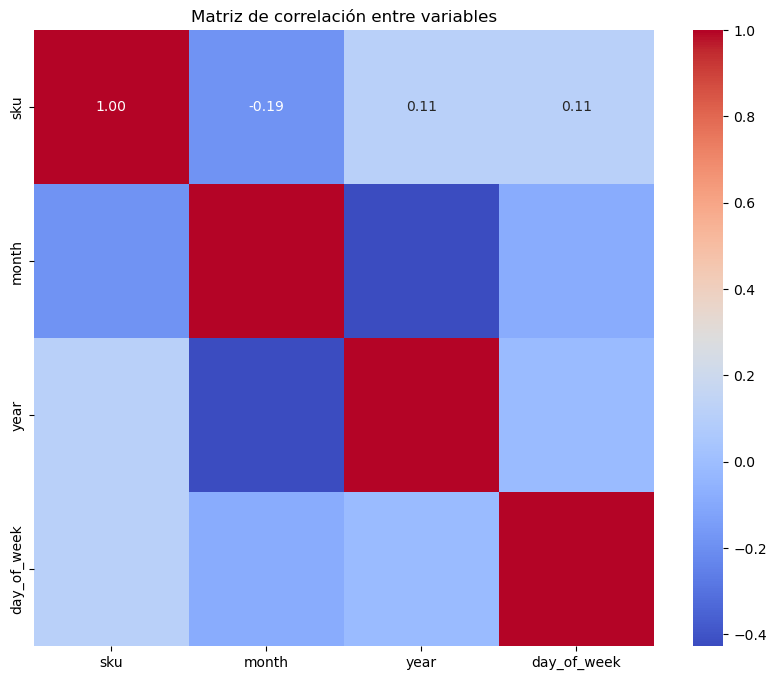

In [130]:
# 2. Comprobar correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables')
plt.show()

In [132]:
# 4. Preparación del modelo de clasificación para predecir el tipo de reclamo y reducir casos
# Filtramos para los tipos de reclamo relevantes
df_filtered2 = df_filtered[df_filtered['name'].isin(['Calidad', 'cantidad diferente', 'producto cruzado'])]
df_filtered2

,date_created,sku,name,Resultado de seleccion producto faltante o sobrante,Seleccion de tipo problema de calidad,country,Cantidad Reportada,Problema,Cliente se queda con el producto,month,year,day_of_week
0,2023-10-06 09:40:35.095,50000615,Calidad,NaN,rust,GT,22,rust,true,10,2023,4
1,2023-10-19 12:00:55.143,50000086,Calidad,NaN,fold,GT,1,fold,true,10,2023,3
2,2023-10-19 16:33:27.839,50000647,Calidad,NaN,rust,GT,2,rust,false,10,2023,3
3,2023-10-24 15:01:48.867,50000532,Calidad,NaN,damaged,GT,01,damaged,NaN,10,2023,1
4,2023-10-24 15:03:34.616,50000719,Calidad,NaN,fold,GT,02,fold,NaN,10,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1662,2024-10-10 18:55:54.729,50004530,Calidad,NaN,rust,GT,1,rust,true,10,2024,3
1663,2024-10-14 20:09:44.022,50000202,Calidad,NaN,fold,GT,3,fold,false,10,2024,0
1667,2024-10-14 21:17:06.865,50000721,Calidad,NaN,rust,GT,25,rust,false,10,2024,0
1669,2024-10-22 21:00:59.022,50000331,Calidad,NaN,fold,GT,02,fold,false,10,2024,1


In [133]:
# Configuración de variables para el modelo
X = df_filtered2[['month', 'day_of_week', 'sku', 'country']]  # Puedes añadir más columnas
y = df_filtered2['name']  # Tipo de reclamo como variable objetivo


In [134]:
# One-Hot Encoding para variables categóricas y escalado de numéricas
categorical_features = ['sku', 'country']
numerical_features = ['month', 'day_of_week']

In [135]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

In [136]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [142]:
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(      month  day_of_week       sku country
 12       11            0  50000232      GT
 547       5            2  70000767      GT
 1090      8            0  50000342      GT
 742       6            3  50012478      NI
 1420      9            2  50000669      CR
 ...     ...          ...       ...     ...
 1532      9            3  70000974      NI
 1610     10            2  50000345      GT
 1663     10            0  50000202      GT
 1279      8            1  50000269      GT
 1659     10            3  50000809      GT
 
 [907 rows x 4 columns],
       month  day_of_week       sku country
 1180      8            0  50000423      GT
 1333      8            0  50000234      GT
 600       5            4  50003063      NI
 692       6            2  50000463      GT
 1134      8            3  50003221      NI
 ...     ...          ...       ...     ...
 78        1            1  50000448      GT
 1331      8            0  50000166      GT
 80        1            2  50000648      GT
 835 

In [143]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['month', 'day_of_week']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sku', 'country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [144]:
# Evaluación del modelo
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy:.2f}')


ValueError: Found unknown categories [31000116, 50000012, 50000033, 50000058, 50000068, 50000098, 50000163, 50000236, 50000274, 50000285, 50000344, 50000379, 50000381, 50000434, 50000443, 50000446, 50000465, 50000475, 50000531, 50000532, 50000557, 50000564, 50000599, 50000648, 50000657, 50000708, 50000745, 50000804, 50000818, 50001609, 50002810, 50002813, 50003202, 50003234, 50003712, 50004273, 50010421, 50010693, 50012564, 50013053, 50013082, 50013110, 50013113, 50013165, 50014564, 70000493, 70000584, 70000738, 70000770, 70000856, 70000886, 70000890, 70000945, 70001206, 70001212, 70001215, 70001218, 70001637, 70002045, 70002799, 70004415, 70005300] in column 0 during transform

In [141]:
rust_cases = df[(df['name'] == 'Calidad') & (df['Seleccion de tipo problema de calidad'] == 'rust')]


KeyError: 'Seleccion de tipo problema de calidad'